# Introduction to Python :: Session 5

Brent Nef  
September 19, 2018

* Jupyter notebooks <https://python.because.work/>
* <https://github.com/n3f/intro-python/tree/session05>

# #TODO

* [Data Visualizations](#Data-Visualizations)
* [matplotlib](#matplotlib)
* [Pygal](#Pygal:-an-svg-charting-library)
* [Using Data](#Getting-Data)
* [Mapping Data](#Mapping-data)
* [Working with APIs](#Working-with-APIs)

# Data Visualizations

* Python is used in all sorts of data-intensize work:
   * genetics
   * climate research
   * political/economic analysis

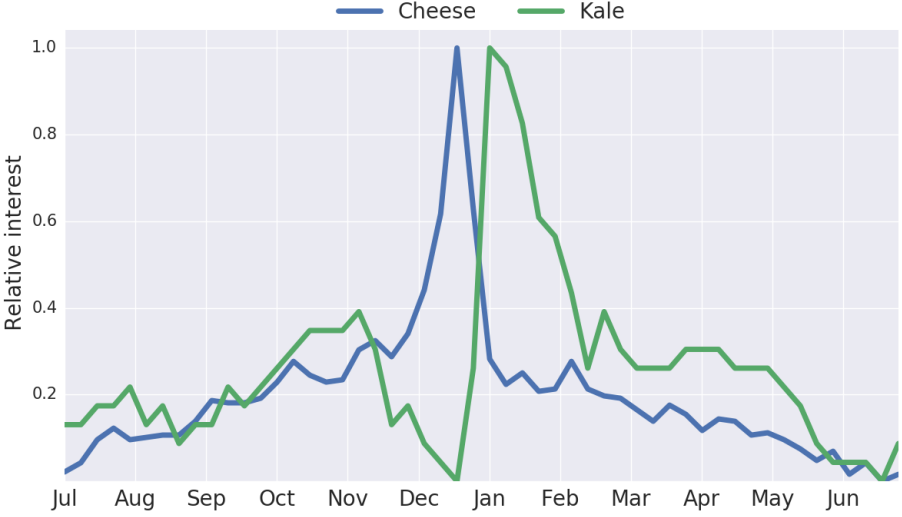  
[source](https://www.reddit.com/r/dataisbeautiful/comments/7nnbt2/average_search_interest_in_cheese_and_kale_in_the/)

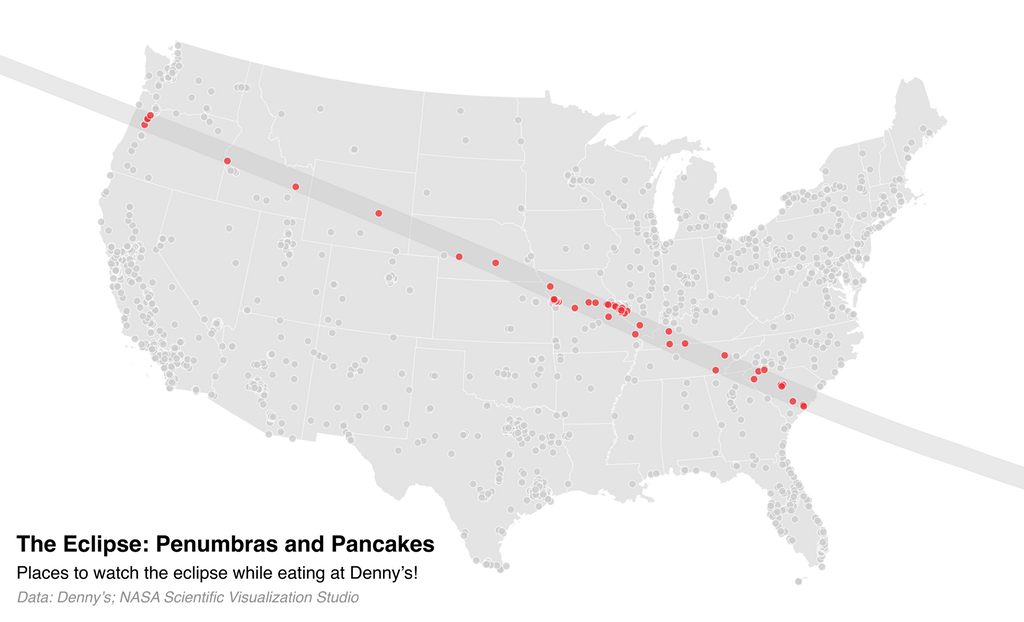 
[source](https://www.reddit.com/r/dataisbeautiful/comments/6uypt4/the_best_dennys_locations_to_see_the_total_solar/)

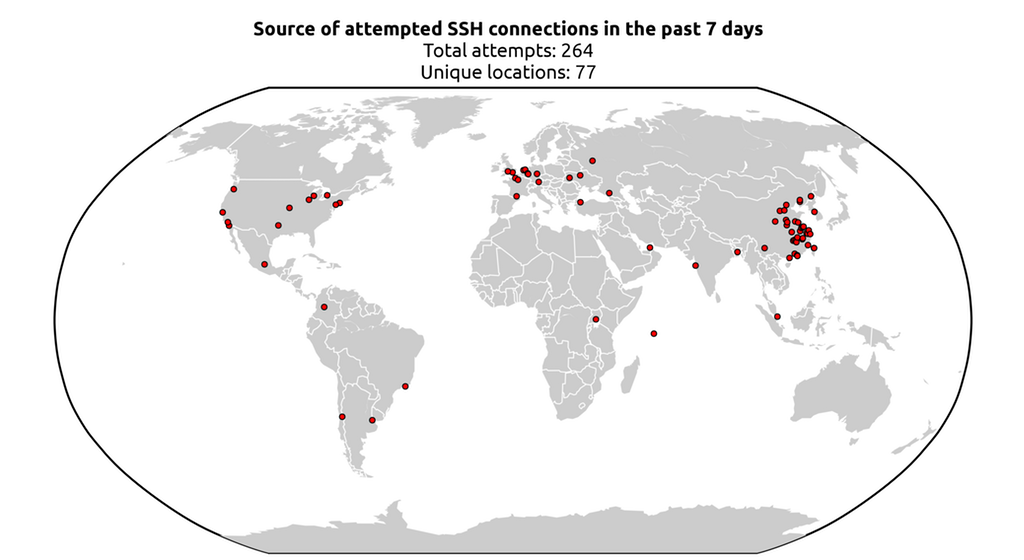  
[source](https://www.reddit.com/r/dataisbeautiful/comments/30ybds/who_tried_to_break_into_my_computer_this_week_oc/)

# <span style="text-transform: none;">`matplotlib`</span>

* *mat*hematical *plot*ting *lib*rary - Python library for graphing data
* [Sample gallery](http://matplotlib.org) - click the figures to get the python code to duplicate

## Installation

* `conda install matplotlib`

## Usage

* For regular python usage: `import matplotlib`
* For jupyter notebooks: `%matplotlib notebook`

In [1]:
%matplotlib notebook

## Plotting a Simple Line Graph

<IPython.core.display.Javascript object>


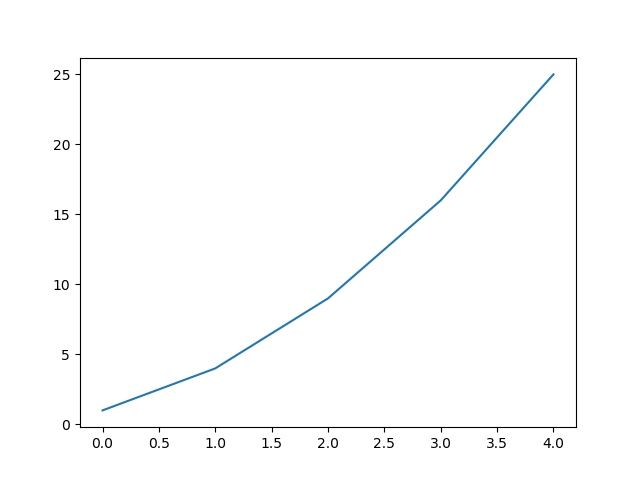

In [2]:
import matplotlib.pyplot as plt

squares = [1, 4, 9, 16, 25]
plt.plot(squares)
plt.show() # plt.savefig(<filename>) will save your image to disk

### Change the label type and Graph Thickness

<IPython.core.display.Javascript object>


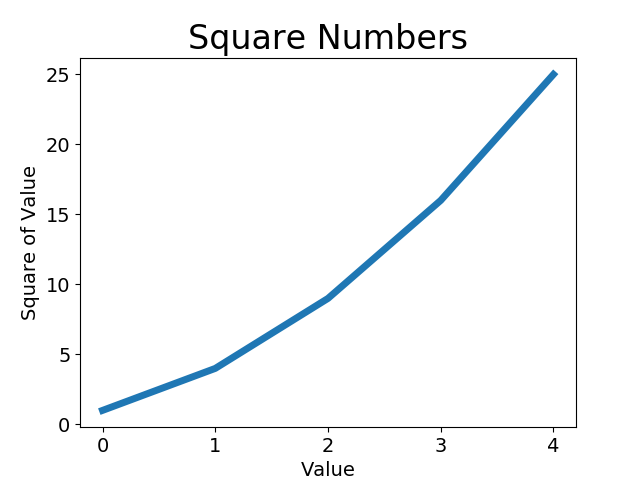

In [3]:
plt.plot(squares, linewidth=5)
plt.title('Square Numbers', fontsize=24)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Square of Value', fontsize=14)
plt.tick_params(axis='both', labelsize=14)

## What's wrong?

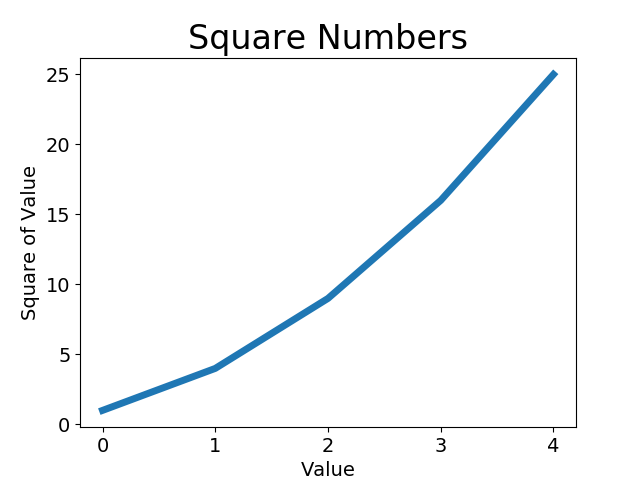

<IPython.core.display.Javascript object>


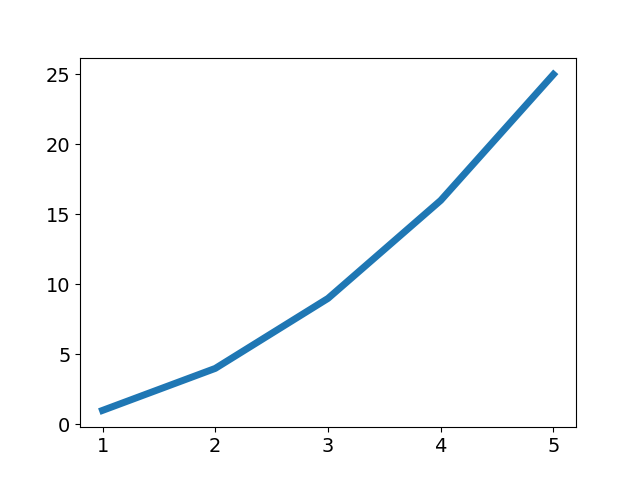

In [4]:
# Add the indexes (x-axis values)
index_values = [1, 2, 3, 4, 5]
plt.plot(index_values, squares, linewidth=5)
plt.tick_params(axis='both', labelsize=14)

## Plotting single points (use `scatter`)

<IPython.core.display.Javascript object>


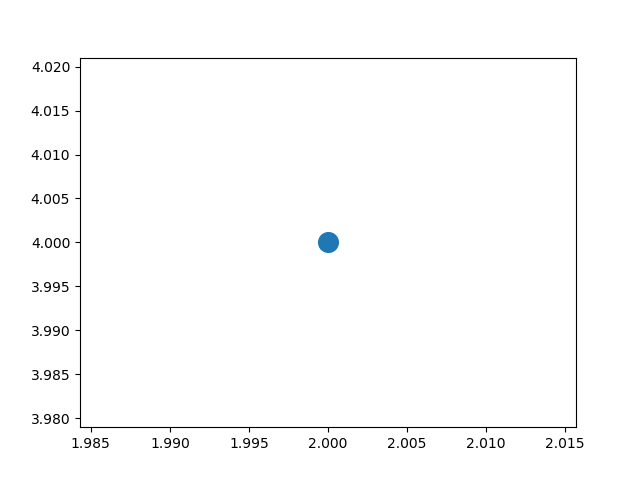

In [5]:
plt.scatter(2, 4, s=200)
plt.show()

<IPython.core.display.Javascript object>


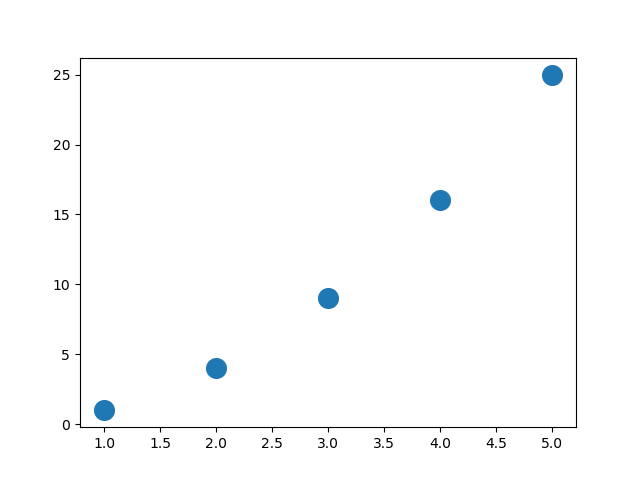

In [6]:
plt.scatter(index_values, squares, s=200)
plt.show()

## Customizing the graph

<IPython.core.display.Javascript object>


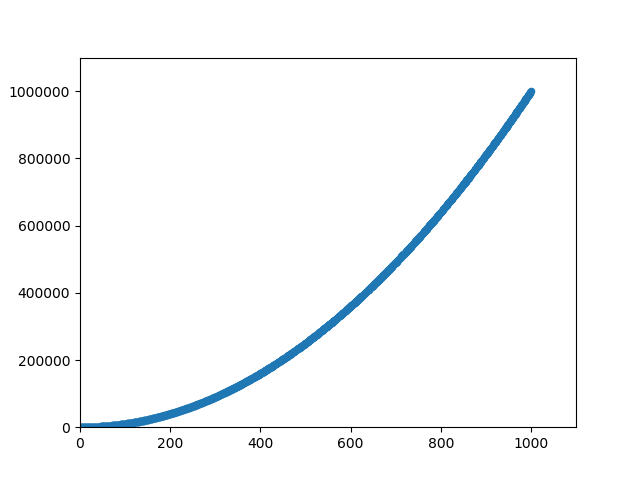

In [7]:
index_values = [i for i in range(1001)]
squares = [i**2 for i in range(1001)]
plt.axis([0, 1100, 0, 1100000])
plt.scatter(index_values, squares, s=20)
#plt.scatter(index_values, squares, c='red', s=20)
#plt.scatter(index_values, squares, c=(0, 0.8, 0), s=40)
#plt.scatter(index_values, squares, c=squares, cmap=plt.cm.Blues, s=40)
plt.show()

# Plot a Random Walk

In [8]:
from random import choice, randint

class RandomWalk():

    def __init__(self, num_points=5000):
        self.num_points = num_points
        self.x_values = [randint(0, num_points)]
        self.y_values = [randint(0, num_points)]
        self.fill_walk()
    
    def fill_walk(self):
        #   step =         direction       * distance
        get_step = lambda: choice([-1, 1]) * randint(0, 4)
        while len(self.x_values) < self.num_points:
            #x_dir = choice([-1, 1]); x_dist = randint(0, 4); x_step = x_dir * x_dist
            x_step = get_step()
            y_step = get_step()
            if x_step == 0 and y_step == 0: continue # Avoid going nowhere
            
            self.x_values.append(self.x_values[-1] + x_step)
            self.y_values.append(self.y_values[-1] + y_step)

<IPython.core.display.Javascript object>


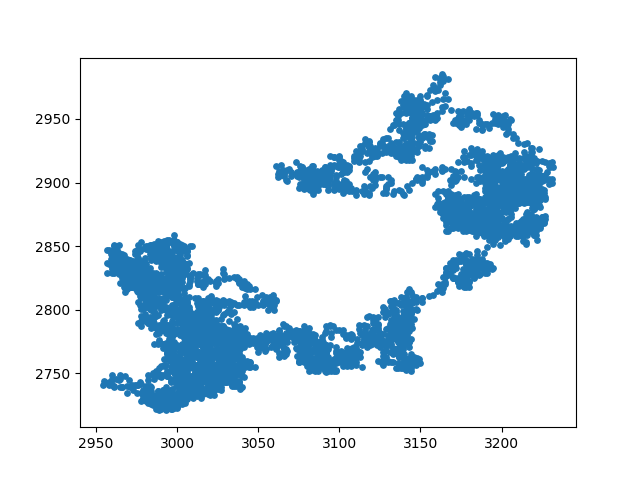

In [9]:
rw = RandomWalk()
plt.scatter(rw.x_values, rw.y_values, s=15)
plt.show()

<IPython.core.display.Javascript object>


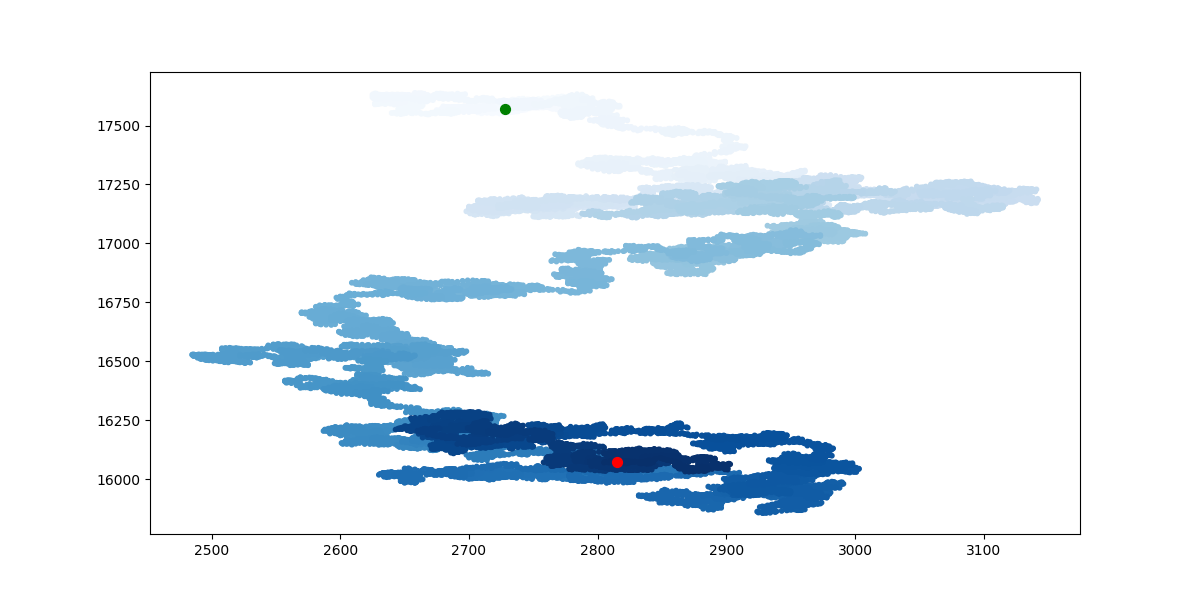

In [12]:
rw = RandomWalk(50000)
plt.figure(figsize=(12,6))
plt.scatter(rw.x_values, rw.y_values, c=list(range(rw.num_points)), cmap=plt.cm.Blues, s=10)
#plt.plot(rw.x_values, rw.y_values) #plot?
plt.scatter(rw.x_values[0], rw.y_values[0], c='green', s=50)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', s=50)
plt.show()

# Pygal: an svg charting library

* <http://www.pygal.org>
* SVG: scalable vector graphics
* Install: `pip install pygal pygal_maps_world` <span style="font-size:.8em">*not on default conda channels*</span>
* usage:

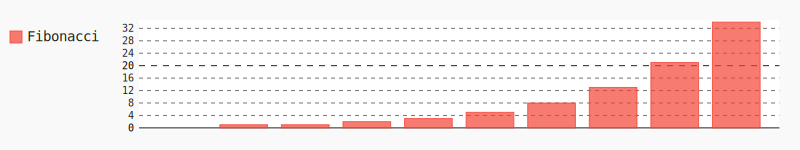

In [13]:
from IPython.display import SVG, display
import pygal

bar_chart = pygal.Bar(height=150)
bar_chart.add('Fibonacci', [0,1,1,2,3,5,8,13,21,34])
display(SVG(bar_chart.render(disable_xml_declaration=True)))

## Rolling Dice and charting results

In [14]:
from random import randint

class Die():
    """A class representing a single die."""

    def __init__(self, num_sides=6):
        """Assume a six-sided die."""
        self.num_sides = num_sides

    def roll(self):
        """Return a random value between 1 and num_sides"""
        return randint(1, self.num_sides)

In [15]:
from collections import Counter
d6 = Die(6)
results = Counter(d6.roll() for i in range(1000))
print(results)

Counter({5: 186, 6: 176, 1: 171, 4: 168, 3: 151, 2: 148})


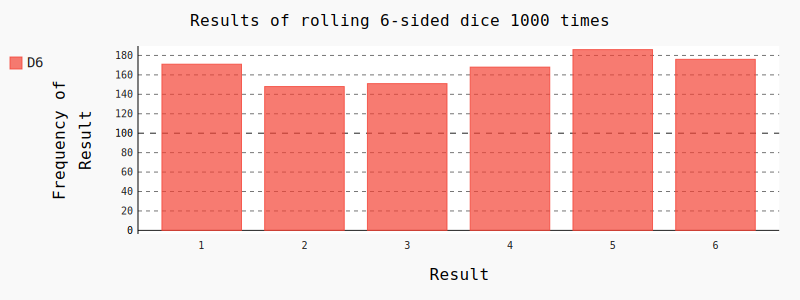

In [16]:
# Visualize the results
histogram = pygal.Bar(height=300)
histogram.title = 'Results of rolling %s-sided dice %s times' % (6, 1000)
histogram.x_labels = ['1', '2', '3', '4', '5', '6']
histogram.x_title = 'Result'
histogram.y_title = 'Frequency of Result'
histogram.add('D6', [i[1] for i in sorted(results.items())])
display(SVG(histogram.render(disable_xml_declaration=True)))

#### 15-6: Automatic Labels
Modify previous example by replacing the list
we used to set the value of `histogram.x_labels` with a loop to generate this list automatically.

#### Add another result option
Simulate rolling 2 6-sided die and compare with the results of rolling 1 6-sided die

# Getting Data

* Data is everywhere, and much of it is packaged and structured enough to start running algorithms
* Visualizations help to discover patterns and connections other people haven't seen yet

## CSV: *Comma-separated values*

* Example: *Weather data in Sitka, Alaska*
  
  ```csv
  2014-1-5,61,44,26,18,7,-1,56,30,9,30.34,30.27,30.15,,,,10,4,,0.00,0,,195
  ```
* Use the `csv` module to inspect data

In [17]:
import csv

with open('sitka_weather_07-2014.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']


In [18]:
for i,v in enumerate(header_row):
    print('%2d %s' % (i, v.strip()))

 0 AKDT
 1 Max TemperatureF
 2 Mean TemperatureF
 3 Min TemperatureF
 4 Max Dew PointF
 5 MeanDew PointF
 6 Min DewpointF
 7 Max Humidity
 8 Mean Humidity
 9 Min Humidity
10 Max Sea Level PressureIn
11 Mean Sea Level PressureIn
12 Min Sea Level PressureIn
13 Max VisibilityMiles
14 Mean VisibilityMiles
15 Min VisibilityMiles
16 Max Wind SpeedMPH
17 Mean Wind SpeedMPH
18 Max Gust SpeedMPH
19 PrecipitationIn
20 CloudCover
21 Events
22 WindDirDegrees


## Get the max temps

In [19]:
with open('sitka_weather_07-2014.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    highs = []
    for row in reader:
        highs.append(int(row[1]))

## Display the high temps

<IPython.core.display.Javascript object>


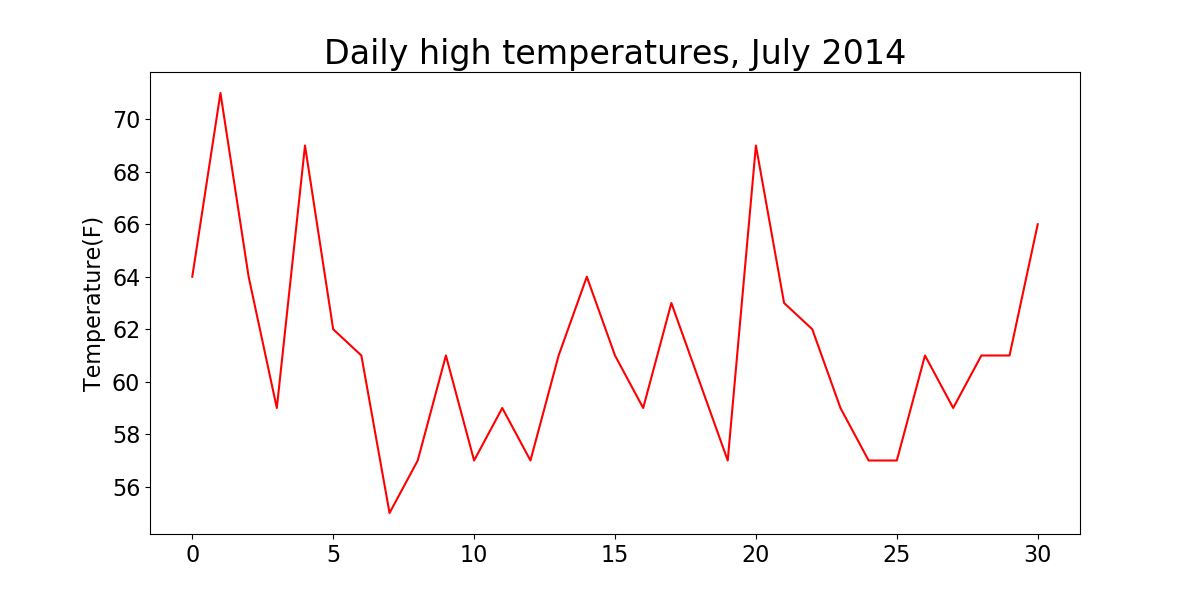

In [20]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,6))
plt.plot(highs, c='red')

plt.title('Daily high temperatures, July 2014', fontsize=24)
plt.xlabel('', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

## Working with dates

* `datetime` module provides objects to represent dates and times
* `strptime(date_to_parse, format)`: *string parse time*
   * `date_to_parse` is the string containing the date
   * `format` provides a template for the values you wish to parse (e.g. `'%Y-%m-%d'` in this dataset)

     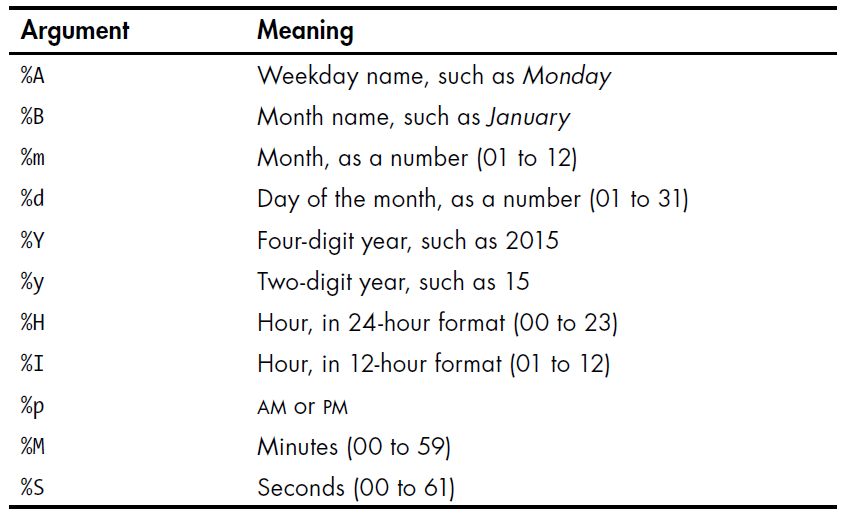

In [21]:
from datetime import datetime

with open('sitka_weather_07-2014.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs = [], []
    for row in reader:
        dates.append(datetime.strptime(row[0], '%Y-%m-%d'))
        highs.append(int(row[1]))

<IPython.core.display.Javascript object>


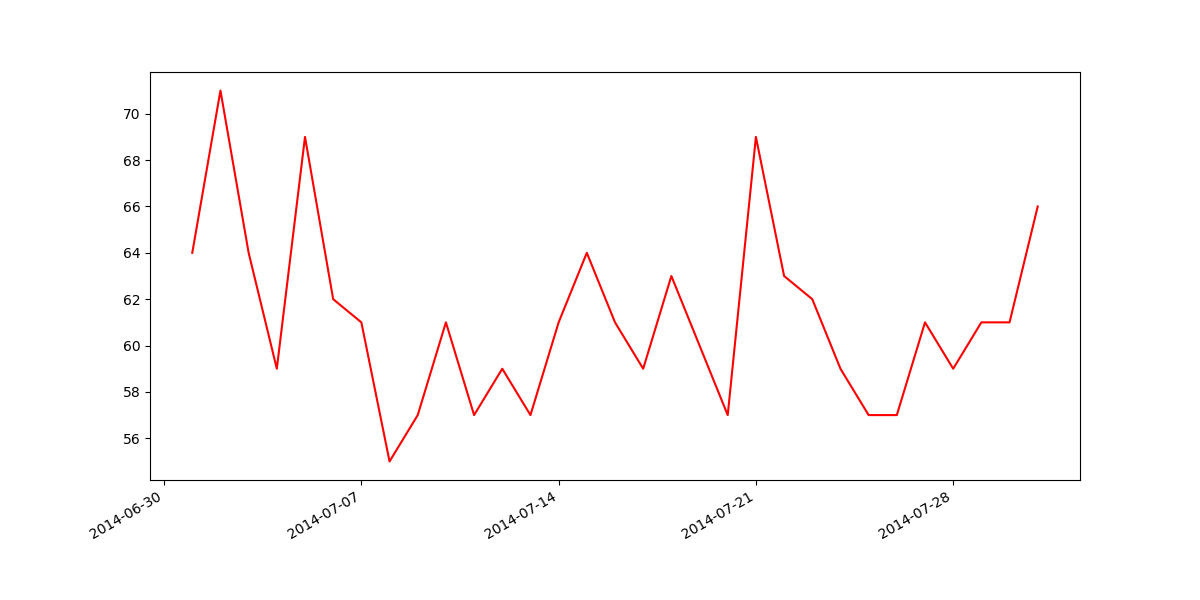

In [22]:
fig = plt.figure(figsize=(12,6))
plt.plot(dates, highs, c='red')
fig.autofmt_xdate()
plt.show()

## Adding another series

In [23]:
with open('sitka_weather_07-2014.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs, lows = [], [], []
    for row in reader:
        dates.append(datetime.strptime(row[0], '%Y-%m-%d'))
        highs.append(int(row[1]))
        lows.append(int(row[3]))

<IPython.core.display.Javascript object>


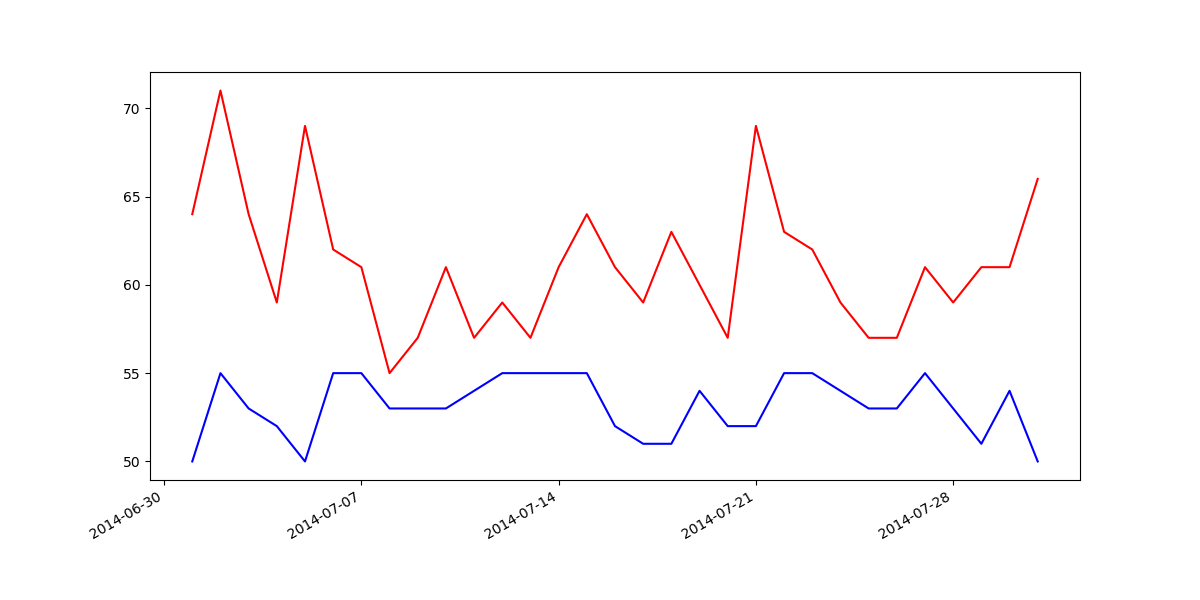

In [24]:
fig = plt.figure(figsize=(12,6))
plt.plot(dates, highs, c='red')
plt.plot(dates, lows, c='blue')
fig.autofmt_xdate()
plt.show()

#### Try it on more data

* Try to graph the data for the whole year (`sitka_weather_2014.csv`)
* What happens if you try to plot (`death_valley_2014.csv`)? Can you fix it?

# Mapping data

* Using population data from [population_data.json](/edit/population_data.json)
* Looks like long python list:
  ```json
  [
    {
      "Country Name": "Arab World",
      "Country Code": "ARB",
      "Year": "1961",
      "Value": "98882541.4"
    },
    ...
  ]
  ```

## Filter based on year 2010

In [25]:
import json

with open('population_data.json') as f:
    data = json.load(f)

data = [datum for datum in data if datum.get('Year', '') == '2010']
data[:2]

[{'Country Name': 'Arab World',
  'Country Code': 'ARB',
  'Year': '2010',
  'Value': '357868000'},
 {'Country Name': 'Caribbean small states',
  'Country Code': 'CSS',
  'Year': '2010',
  'Value': '6880000'}]

## Convert data

* Change numerical strings to ints.  Since some data is coming as decimals, convert to float first, then int
* Get the pygal country code, see `pygal_maps_world.i18n.COUNTRIES`

In [27]:
from pygal_maps_world.i18n import COUNTRIES

def get_country_code(country_name):
    for code, name in COUNTRIES.items():
        if name.lower() == country_name.lower():
            return code
    return None

cc_pop = {}
for d in data:
    cc = get_country_code(d['Country Name'])
    if cc is not None:
        cc_pop[cc] = int(float(d['Value']))

#cc_pop

In [ ]:
worldmap = pygal.maps.world.World(height=550)
worldmap.title = 'World Population in 2010, by Country'
worldmap.add('2010', cc_pop)

display(SVG(worldmap.render(disable_xml_declaration=True)))

### Group countries by population

In [31]:
cc_pop_1billion = {}
cc_pop_10million = {}
cc_pop_less = {}

for d in data:
    cc = get_country_code(d['Country Name'])
    pop = int(float(d['Value']))
    if cc is None: continue
    if pop >= 1000000000: cc_pop_1billion[cc] = pop
    elif pop >= 10000000: cc_pop_10million[cc] = pop
    else: cc_pop_less[cc] = pop

#[cc_pop_1billion, cc_pop_10million, cc_pop_less]

In [ ]:
worldmap = pygal.maps.world.World()
worldmap.title = 'World Population in 2010, by Country'
worldmap.add('0-10m', cc_pop_less)
worldmap.add('10m-1bn', cc_pop_10million)
worldmap.add('>1bn', cc_pop_1billion)

display(SVG(worldmap.render(disable_xml_declaration=True)))

#### 16-5: All Countries

On the population maps we made in this section, our program
couldn’t automatically find two-letter codes for about 12 countries. Work
out which countries are missing codes, and look through the `COUNTRIES` dictionary
for the codes. Add an `if-elif` block to `get_country_code()` so it returns the
correct country code values for these specific countries:

```py
if country_name == 'Yemen, Rep.'
    return 'ye'
elif:
    pass
```
Place this code after the `COUNTRIES` loop but before the `return None` statement.
When you’re finished, you should see a more complete map.

# Working with APIs

* Programmatic access to certain information
   * Accessed through specific URLs
   * Returns data in json, xml, or other format

## Returning data

<https://api.github.com/search/repositories?q=language:python&sort=stars>

* Get the number of projects hosted on github, and some information about the most popular repositories

## `requests` module

* [*HTTP for humans*](http://docs.python-requests.org/en/master/) [🏆](http://docs.python-requests.org/en/master/api/#requests.request)
* Install: `conda install requests` or `pip install requests`

In [35]:
import requests

# Make an API call, and store the response.
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
r = requests.get(url)
print("Status code:", r.status_code)

# Store API response in a variable.
response_dict = r.json()
print(response_dict.keys())

Status code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


## Working with the response dictionary

In [36]:
print("Total repositories:", response_dict['total_count'])

# Explore information about the repositories.
repo_dicts = response_dict['items']
print('Repositories returned', len(repo_dicts))

# Examine the first repo
repo_dict = repo_dicts[0]
print('\nKeys:', len(repo_dict))
for key in sorted(repo_dict.keys()):
    print(key)

Total repositories: 3006569
Repositories returned 30

Keys: 73
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
trees_url
updated_at
url
watchers
watchers_count


## Look at the projects

In [37]:
for repo_dict in repo_dicts:
    print('\nName:', repo_dict['name'])
    print('Owner:', repo_dict['owner']['login'])
    print('Stars:', repo_dict['stargazers_count'])
    print('Repository:', repo_dict['html_url'])
    print('Description:', repo_dict['description'])


Name: awesome-python
Owner: vinta
Stars: 55347
Repository: https://github.com/vinta/awesome-python
Description: A curated list of awesome Python frameworks, libraries, software and resources

Name: system-design-primer
Owner: donnemartin
Stars: 48625
Repository: https://github.com/donnemartin/system-design-primer
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Name: public-apis
Owner: toddmotto
Stars: 42212
Repository: https://github.com/toddmotto/public-apis
Description: A collective list of public JSON APIs for use in web development.

Name: youtube-dl
Owner: rg3
Stars: 41793
Repository: https://github.com/rg3/youtube-dl
Description: Command-line program to download videos from YouTube.com and other video sites

Name: models
Owner: tensorflow
Stars: 41598
Repository: https://github.com/tensorflow/models
Description: Models and examples built with TensorFlow

Name: flask
Owner: pallets
Stars: 38856
Repository: ht

## Graph the ⭐️🌟⭐️

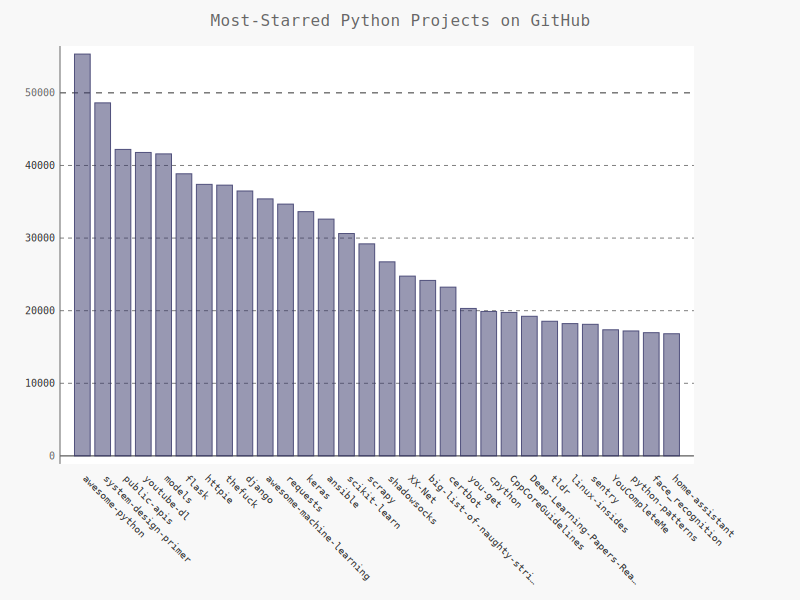

In [39]:
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS

names, stars = [], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

# Make visualization.
my_style = LS('#333366', base_style=LCS)
chart = pygal.Bar(style=my_style, x_label_rotation=45, show_legend=False)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', stars)
display(SVG(chart.render(disable_xml_declaration=True)))

## We can make it look better

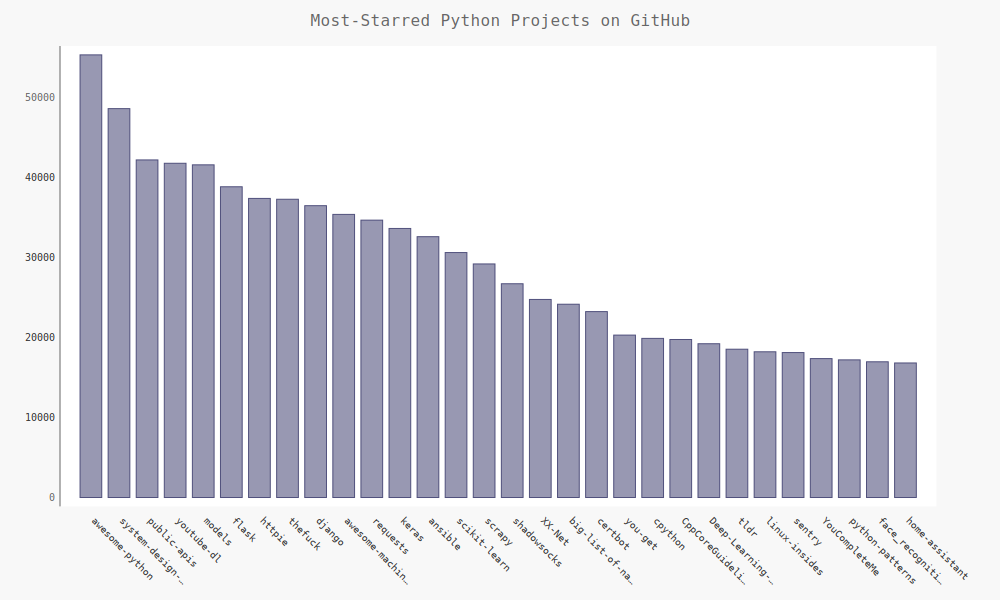

In [40]:
my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size = 18
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000

chart = pygal.Bar(my_config, style=my_style, x_label_rotation=45, show_legend=False)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', stars)
display(SVG(chart.render(disable_xml_declaration=True)))

## Add tooltip and link to repo

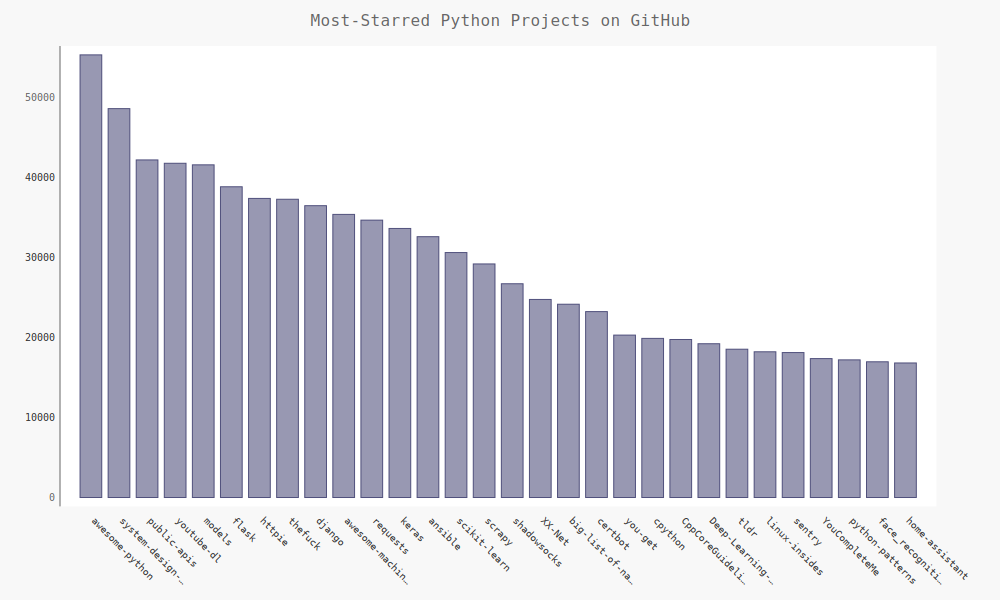

In [48]:
names, plot_dicts = [], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])

    plot_dict = {
        'value': repo_dict['stargazers_count'],
        'label': repo_dict['description'],
        'xlink': repo_dict['html_url'],
    }
    plot_dicts.append(plot_dict)
    
chart = pygal.Bar(my_config, style=my_style, x_label_rotation=45, show_legend=False)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', plot_dicts)
display(SVG(chart.render(disable_xml_declaration=True)))

### 17-1: Other Languages

Modify the API call in python_repos.py so it generates
a chart showing the most popular projects in other languages. Try languages
such as JavaScript, Ruby, C, Java, Perl, Haskell, and Go.

In [ ]:
# do 17-1

## XKCD

In [95]:
from __future__ import braces

SyntaxError: not a chance (<ipython-input-95-6d5c5b2f0daf>, line 1)

In [96]:
import antigravity

<IPython.core.display.Javascript object>


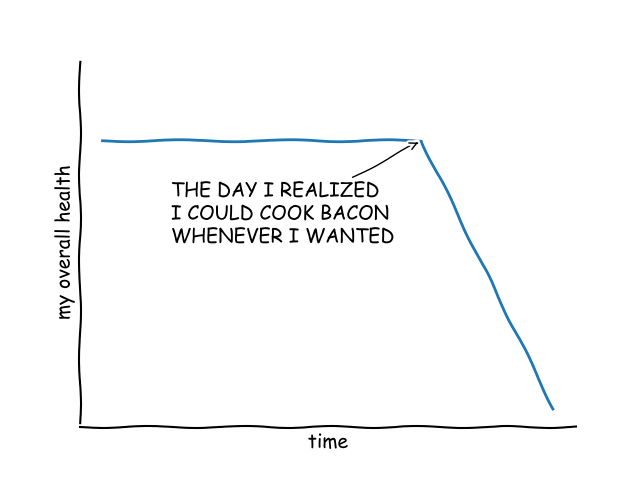

In [49]:
from matplotlib import pyplot as plt
import numpy as np

plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

plt.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

plt.plot(data)

plt.xlabel('time')
plt.ylabel('my overall health')
plt.show()

<IPython.core.display.Javascript object>


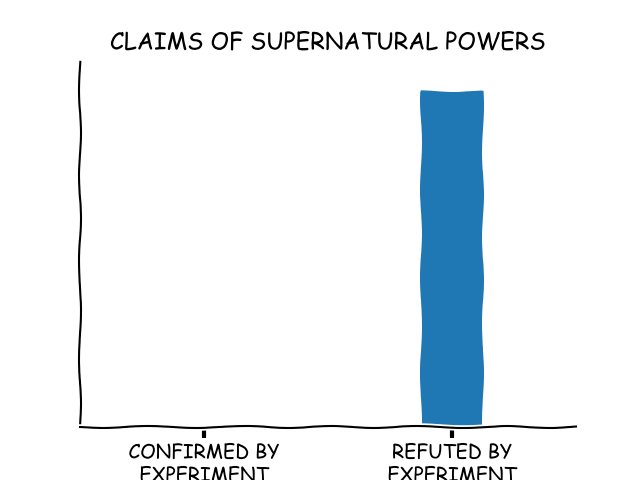

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar([0., 1.], [0, 100], 0.25)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([0, 1])
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, 110])
ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
plt.yticks([])

plt.title("CLAIMS OF SUPERNATURAL POWERS")

plt.show()

# Other links

* [matplotlib cheat sheet][cheatsheet]
* [matplotlib documentation][dox]
* [matplotlib gallery](https://matplotlib.org/gallery.html)

[cheatsheet]: http://nbviewer.jupyter.org/urls/gist.githubusercontent.com/Jwink3101/e6b57eba3beca4b05ec146d9e38fc839/raw/f486ca3dcad44c33fc4e7ddedc1f83b82c02b492/Matplotlib_Cheatsheet
[dox]: https://matplotlib.org/Matplotlib.pdf


# Next Week :: The End 😢

* Web Application Frameworks